[*********************100%***********************]  1 of 1 completed


Visual report saved to RollingDailyReturnsReport.pdf


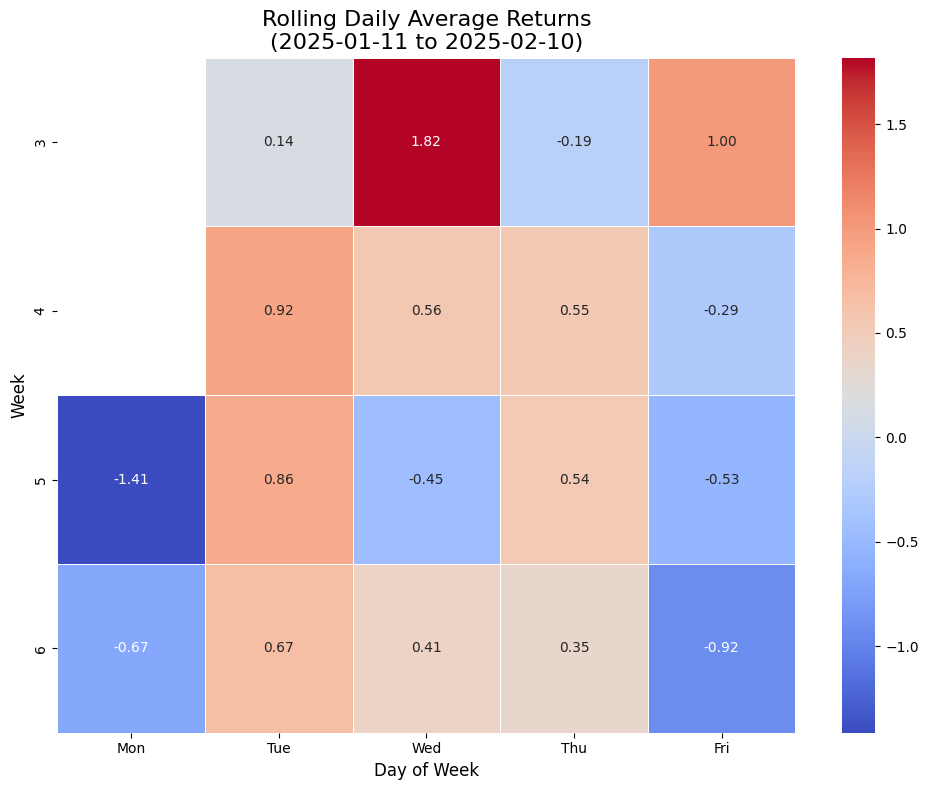

CSV data saved to RollingDailyReturns.csv


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

# Define the tickers for the stocks (here just 'SPY', but you can add more if desired)
tickers = ['SPY']

# Set the rolling window: use today as the end date and 30 days ago as the start date.
today = datetime.date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = (today - datetime.timedelta(days=30)).strftime("%Y-%m-%d")

# Download daily data from Yahoo Finance for the rolling window
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Close']

# Calculate daily returns (percentage change) and drop the initial NaN row
daily_returns = data.pct_change().dropna() * 100

# Since we have one ticker, the daily average is simply the same as its return.
daily_avg_return = daily_returns.mean(axis=1)

# Create a DataFrame from the daily average returns for visualization.
# (Even with a single ticker, this structure makes it easy to pivot for a calendar heatmap.)
calendar_data = daily_avg_return.reset_index()
calendar_data.columns = ['Date', 'Return']
calendar_data['Year'] = calendar_data['Date'].dt.year
calendar_data['Month'] = calendar_data['Date'].dt.month
calendar_data['Day'] = calendar_data['Date'].dt.day
calendar_data['Weekday'] = calendar_data['Date'].dt.weekday
calendar_data['Week'] = calendar_data['Date'].dt.isocalendar().week

# Pivot the data to a calendar format with Weeks as rows and Weekdays as columns.
calendar_pivot = calendar_data.pivot(index='Week', columns='Weekday', values='Return')

# Adjust the column names for readability (Mon, Tue, Wed, etc.)
weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
calendar_pivot.columns = weekday_labels[:len(calendar_pivot.columns)]

# Plot the calendar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(calendar_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

plt.title(f"Rolling Daily Average Returns\n({start_date} to {end_date})", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Week", fontsize=12)
plt.tight_layout()

# Save the figure as a PDF file
pdf_filename = "RollingDailyReturnsReport.pdf"
plt.savefig(pdf_filename, format="pdf")
print(f"Visual report saved to {pdf_filename}")

plt.show()

# Save the returns data as a CSV file
csv_filename = "RollingDailyReturns.csv"
calendar_data.to_csv(csv_filename, index=False)
print(f"CSV data saved to {csv_filename}")
